Sveučilište u Zagrebu  
Fakultet elektrotehnike i računarstva  
  
## Strojno učenje 2019/2020  
http://www.fer.unizg.hr/predmet/su

------------------------------

### Laboratorijska vježba 1: Regresija

*Verzija: 1.2  
Zadnji put ažurirano: 27. rujna 2019.*

(c) 2015-2019 Jan Šnajder, Domagoj Alagić 

Objavljeno: **30. rujna 2019.**  
Rok za predaju: **21. listopada 2019. u 07:00h**

------------------------------

### Upute

Prva laboratorijska vježba sastoji se od deset zadataka. U nastavku slijedite upute navedene u ćelijama s tekstom. Rješavanje vježbe svodi se na **dopunjavanje ove bilježnice**: umetanja ćelije ili više njih **ispod** teksta zadatka, pisanja odgovarajućeg kôda te evaluiranja ćelija. 

Osigurajte da u potpunosti **razumijete** kôd koji ste napisali. Kod predaje vježbe, morate biti u stanju na zahtjev asistenta (ili demonstratora) preinačiti i ponovno evaluirati Vaš kôd. Nadalje, morate razumjeti teorijske osnove onoga što radite, u okvirima onoga što smo obradili na predavanju. Ispod nekih zadataka možete naći i pitanja koja služe kao smjernice za bolje razumijevanje gradiva (**nemojte pisati** odgovore na pitanja u bilježnicu). Stoga se nemojte ograničiti samo na to da riješite zadatak, nego slobodno eksperimentirajte. To upravo i jest svrha ovih vježbi.

Vježbe trebate raditi **samostalno**. Možete se konzultirati s drugima o načelnom načinu rješavanja, ali u konačnici morate sami odraditi vježbu. U protivnome vježba nema smisla.

In [2]:
# Učitaj osnovne biblioteke...
import numpy as np
import sklearn
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Zadatci

### 1. Jednostavna regresija

Zadan je skup primjera $\mathcal{D}=\{(x^{(i)},y^{(i)})\}_{i=1}^4 = \{(0,4),(1,1),(2,2),(4,5)\}$. Primjere predstavite matricom $\mathbf{X}$ dimenzija $N\times n$ (u ovom slučaju $4\times 1$) i vektorom oznaka $\textbf{y}$, dimenzija $N\times 1$ (u ovom slučaju $4\times 1$), na sljedeći način:


In [3]:
X = np.array([[0],[1],[2],[4]])
y = np.array([4,1,2,5])

### (a)

Proučite funkciju [`PolynomialFeatures`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) iz biblioteke `sklearn` i upotrijebite je za generiranje matrice dizajna $\mathbf{\Phi}$ koja ne koristi preslikavanje u prostor više dimenzije (samo će svakom primjeru biti dodane *dummy* jedinice; $m=n+1$).


In [4]:
from sklearn.preprocessing import PolynomialFeatures

In [5]:
design_matrix = PolynomialFeatures(1).fit_transform(X)
design_matrix

array([[1., 0.],
       [1., 1.],
       [1., 2.],
       [1., 4.]])

### (b)

Upoznajte se s modulom [`linalg`](http://docs.scipy.org/doc/numpy/reference/routines.linalg.html). Izračunajte težine $\mathbf{w}$ modela linearne regresije kao $\mathbf{w}=(\mathbf{\Phi}^\intercal\mathbf{\Phi})^{-1}\mathbf{\Phi}^\intercal\mathbf{y}$. Zatim se uvjerite da isti rezultat možete dobiti izračunom pseudoinverza $\mathbf{\Phi}^+$ matrice dizajna, tj. $\mathbf{w}=\mathbf{\Phi}^+\mathbf{y}$, korištenjem funkcije [`pinv`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.pinv.html).

In [6]:
from numpy import linalg

In [7]:
w = linalg.inv(dot(design_matrix.T, design_matrix)).dot(design_matrix.T).dot(y)
w

array([2.2       , 0.45714286])

In [8]:
w2 = linalg.pinv(design_matrix).dot(y)
w2

array([2.2       , 0.45714286])

Radi jasnoće, u nastavku je vektor $\mathbf{x}$ s dodanom *dummy* jedinicom $x_0=1$ označen kao $\tilde{\mathbf{x}}$.

### (c)

Prikažite primjere iz $\mathcal{D}$ i funkciju $h(\tilde{\mathbf{x}})=\mathbf{w}^\intercal\tilde{\mathbf{x}}$. Izračunajte pogrešku učenja prema izrazu $E(h|\mathcal{D})=\frac{1}{2}\sum_{i=1}^N(\tilde{\mathbf{y}}^{(i)} - h(\tilde{\mathbf{x}}))^2$. Možete koristiti funkciju srednje kvadratne pogreške [`mean_squared_error`]( http://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html) iz modula [`sklearn.metrics`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics).

**Q:** Gore definirana funkcija pogreške $E(h|\mathcal{D})$ i funkcija srednje kvadratne pogreške nisu posve identične. U čemu je razlika? Koja je "realnija"?

In [9]:
def h(x, w):
    return dot(x, w.transpose())

y_pred = h(design_matrix, w.transpose())
y_pred

array([2.2       , 2.65714286, 3.11428571, 4.02857143])

In [10]:
from sklearn import metrics

E = metrics.mean_squared_error(y, y_pred)
E

2.042857142857143

### (d)

Uvjerite se da za primjere iz $\mathcal{D}$ težine $\mathbf{w}$ ne možemo naći rješavanjem sustava $\mathbf{w}=\mathbf{\Phi}^{-1}\mathbf{y}$, već da nam doista treba pseudoinverz.

**Q:** Zašto je to slučaj? Bi li se problem mogao riješiti preslikavanjem primjera u višu dimenziju? Ako da, bi li to uvijek funkcioniralo, neovisno o skupu primjera $\mathcal{D}$? Pokažite na primjeru.

In [11]:
w3 = linalg.inv(design_matrix).dot(y)
w3

LinAlgError: Last 2 dimensions of the array must be square

### (e) 

Proučite klasu [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) iz modula [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model). Uvjerite se da su težine koje izračunava ta funkcija (dostupne pomoću atributa `coef_` i `intercept_`) jednake onima koje ste izračunali gore. Izračunajte predikcije modela (metoda `predict`) i uvjerite se da je pogreška učenja identična onoj koju ste ranije izračunali.

In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
reg = LinearRegression().fit(X, y)
print(reg.score(X, y))
print(reg.coef_)
print(reg.intercept_)

0.18285714285714272
[0.45714286]
2.2


In [14]:
y_pred = reg.predict(X)
y_pred

array([2.2       , 2.65714286, 3.11428571, 4.02857143])

In [15]:
E2 = metrics.mean_squared_error(y, y_pred)
E2

2.042857142857143

### 2. Polinomijalna regresija i utjecaj šuma

### (a)

Razmotrimo sada regresiju na većem broju primjera. Definirajte funkciju `make_labels(X, f, noise=0)` koja uzima matricu neoznačenih primjera $\mathbf{X}_{N\times n}$ te generira vektor njihovih oznaka $\mathbf{y}_{N\times 1}$. Oznake se generiraju kao $y^{(i)} = f(x^{(i)})+\mathcal{N}(0,\sigma^2)$, gdje je $f:\mathbb{R}^n\to\mathbb{R}$ stvarna funkcija koja je generirala podatke (koja nam je u stvarnosti nepoznata), a $\sigma$ je standardna devijacija Gaussovog šuma, definirana parametrom `noise`. Za generiranje šuma možete koristiti funkciju [`numpy.random.normal`](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.random.normal.html). 

Generirajte skup za učenje od $N=50$ primjera uniformno distribuiranih u intervalu $[-5,5]$ pomoću funkcije $f(x) = 5 + x -2 x^2 -5 x^3$ uz šum  $\sigma=200$:

In [16]:
from numpy.random import normal

def make_labels(X, f, noise=0) :
    return np.array([f(X[i]) + normal(0, noise) for i in range(len(X))])

In [17]:
def make_instances(x1, x2, N) :
    return np.array([np.array([x]) for x in np.linspace(x1,x2,N)])

Prikažite taj skup funkcijom [`scatter`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter).

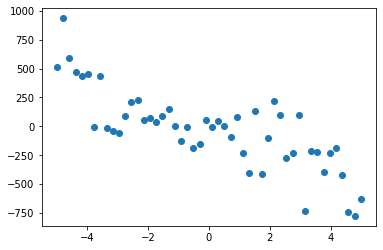

In [18]:
X2 = make_instances(-5, 5, 50)

def f(x):
    return 5 + x - 2*x*x - 5*x*x*x

y2 = make_labels(X2, f, 200)

plt.scatter(X2, y2)
plt.show()

### (b)

Trenirajte model polinomijalne regresije stupnja $d=3$. Na istom grafikonu prikažite naučeni model $h(\mathbf{x})=\mathbf{w}^\intercal\tilde{\mathbf{x}}$ i primjere za učenje. Izračunajte pogrešku učenja modela.

31532.77732965804


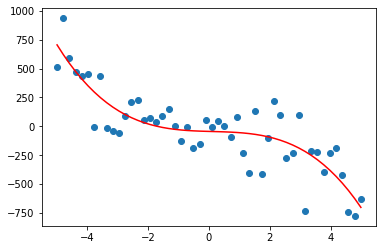

In [19]:
design_matrix2 = PolynomialFeatures(3).fit_transform(X2)
y_pred2 = LinearRegression().fit(design_matrix2, y2).predict(design_matrix2)

E2 = metrics.mean_squared_error(y2, y_pred2)
print(E2)

plt.scatter(X2, y2)
plt.plot(X2, y_pred2, c='r')

### 3. Odabir modela

### (a)

Na skupu podataka iz zadatka 2 trenirajte pet modela linearne regresije $\mathcal{H}_d$ različite složenosti, gdje je $d$ stupanj polinoma, $d\in\{1,3,5,10,20\}$. Prikažite na istome grafikonu skup za učenje i funkcije $h_d(\mathbf{x})$ za svih pet modela (preporučujemo koristiti `plot` unutar `for` petlje). Izračunajte pogrešku učenja svakog od modela.

**Q:** Koji model ima najmanju pogrešku učenja i zašto?

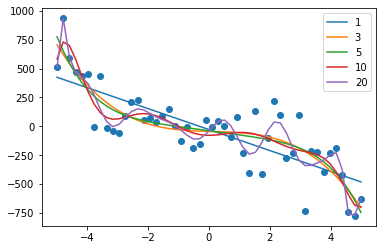

In [20]:
d = [1, 3, 5, 10, 20]

plt.scatter(X2, y2)

for di in d:
    design_matrix_i = PolynomialFeatures(di).fit_transform(X2)
    y_pred_i = LinearRegression().fit(design_matrix_i, y2).predict(design_matrix_i)
    plt.plot(X2, y_pred_i, label=str(di))

pylab.legend(loc='upper right')

### (b)

Razdvojite skup primjera iz zadatka 2 pomoću funkcije [`model_selection.train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) na skup za učenja i skup za ispitivanje u omjeru 1:1. Prikažite na jednom grafikonu pogrešku učenja i ispitnu pogrešku za modele polinomijalne regresije $\mathcal{H}_d$, sa stupnjem polinoma $d$ u rasponu $d\in [1,2,\ldots,20]$. Budući da kvadratna pogreška brzo raste za veće stupnjeve polinoma, umjesto da iscrtate izravno iznose pogrešaka, iscrtajte njihove logaritme.

**NB:** Podjela na skupa za učenje i skup za ispitivanje mora za svih pet modela biti identična.

**Q:** Je li rezultat u skladu s očekivanjima? Koji biste model odabrali i zašto?

**Q:** Pokrenite iscrtavanje više puta. U čemu je problem? Bi li problem bio jednako izražen kad bismo imali više primjera? Zašto?

In [21]:
from sklearn.model_selection import train_test_split

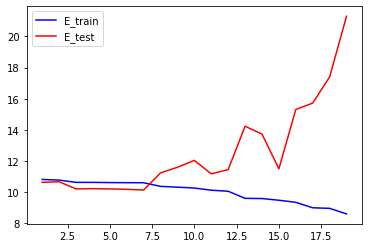

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.5)

d = range(1, 20)
E_train_list = []
E_test_list = []

def calculate_errors(X_train, X_test, y_train, y_test, di):
    dm_train = PolynomialFeatures(di).fit_transform(X_train)
    reg_train = LinearRegression().fit(dm_train, y_train)
    y_pred_train = reg_train.predict(dm_train)

    dm_test = PolynomialFeatures(di).fit_transform(X_test)
    y_pred_test = reg_train.predict(dm_test)
    
    return metrics.mean_squared_error(y_train, y_pred_train), metrics.mean_squared_error(y_test, y_pred_test)

for di in d:
    E_train, E_test = calculate_errors(X_train, X_test, y_train, y_test, di)
    E_train_list.append(math.log(E_train))
    E_test_list.append(math.log(E_test))

plt.plot(d, E_train_list, color='b', label="E_train")
plt.plot(d, E_test_list, color='r', label="E_test")
pylab.legend(loc='upper left')

### (c)

Točnost modela ovisi o (1) njegovoj složenosti (stupanj $d$ polinoma), (2) broju primjera $N$, i (3) količini šuma. Kako biste to analizirali, nacrtajte grafikone pogrešaka kao u 3b, ali za različit $N\in$ (trećina, dvije trećine, sve) i količine šuma $\sigma\in\{100,200,500\}$ (ukupno 9 grafikona). Upotrijebite funkciju [`subplots`](http://matplotlib.org/examples/pylab_examples/subplots_demo.html) kako biste pregledno posložili grafikone u tablicu $3\times 3$. Podatci se generiraju na isti način kao u zadatku 2.

**NB:** Pobrinite se da svi grafikoni budu generirani nad usporedivim skupovima podataka, na sljedeći način. Generirajte najprije svih 1000 primjera, podijelite ih na skupove za učenje i skupove za ispitivanje (dva skupa od po 500 primjera). Zatim i od skupa za učenje i od skupa za ispitivanje načinite tri različite verzije, svaka s drugačijom količinom šuma (ukupno 2x3=6 verzija podataka). Kako bi simulirali veličinu skupa podataka, od tih dobivenih 6 skupova podataka uzorkujte trećinu, dvije trećine i sve podatke. Time ste dobili 18 skupova podataka -- skup za učenje i za testiranje za svaki od devet grafova.

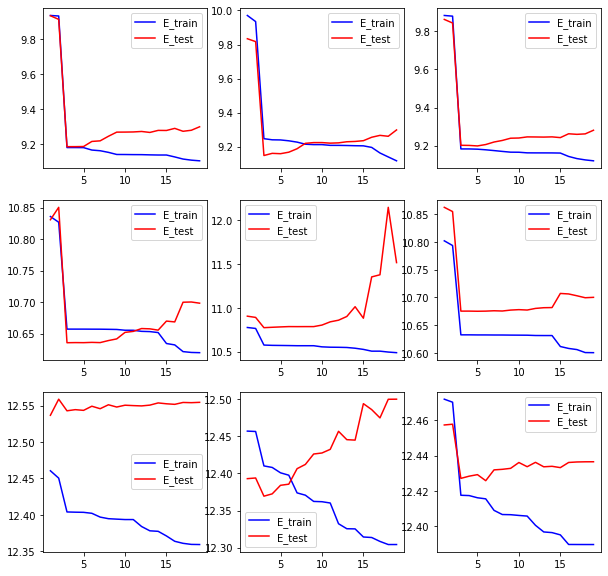

In [83]:
fig, axarr = plt.subplots(3, 3)
fig.set_size_inches(10, 10)
noises = [100, 200, 500]

X3 = make_instances(-5, 5, 1000)
X3_train, X3_test = train_test_split(X3, test_size=0.5)

for i in range(0, 3):
    y3_train = make_labels(X3_train, f, noises[i])
    y3_test = make_labels(X3_test, f, noises[i])
    
    for j in range(1, 4):
        if j != 3:
            X3_train_j, _, y3_train_j, _ = train_test_split(X3_train, y3_train, test_size=j/3)
            _, X3_test_j, _, y3_test_j = train_test_split(X3_test, y3_test, test_size=j/3)
        else:
            X3_train_j = X3_train
            y3_train_j = y3_train
            X3_test_j = X3_test
            y3_test_j = y3_test
            
        E_train_list = []
        E_test_list = []
        
        for di in d:
            E_train, E_test = calculate_errors(X3_train_j, X3_test_j, y3_train_j, y3_test_j, di)
            E_train_list.append(math.log(E_train))
            E_test_list.append(math.log(E_test))
            
        axarr[i, j - 1].plot(d, E_train_list, color='b', label="E_train")
        axarr[i, j - 1].plot(d, E_test_list, color='r', label="E_test")
        axarr[i, j - 1].legend()

***Q:*** Jesu li rezultati očekivani? Obrazložite.

### 4. Regularizirana regresija

### (a)

U gornjim eksperimentima nismo koristili **regularizaciju**. Vratimo se najprije na primjer iz zadatka 1. Na primjerima iz tog zadatka izračunajte težine $\mathbf{w}$ za polinomijalni regresijski model stupnja $d=3$ uz L2-regularizaciju (tzv. *ridge regression*), prema izrazu $\mathbf{w}=(\mathbf{\Phi}^\intercal\mathbf{\Phi}+\lambda\mathbf{I})^{-1}\mathbf{\Phi}^\intercal\mathbf{y}$. Napravite izračun težina za regularizacijske faktore $\lambda=0$, $\lambda=1$ i $\lambda=10$ te usporedite dobivene težine.

**Q:** Kojih je dimenzija matrica koju treba invertirati?

**Q:** Po čemu se razlikuju dobivene težine i je li ta razlika očekivana? Obrazložite.

In [46]:
factors = [0, 1, 10]

design_matrix4 = PolynomialFeatures(3).fit_transform(X)

for factor in factors:
    w_f = dot(
        linalg.inv(numpy.add(
            design_matrix4.T.dot(design_matrix4), 
            factor * np.identity(np.size(design_matrix4, 0)))).dot(design_matrix4.T),
        y)
    print(w_f)

[ 4.         -5.91666667  3.375      -0.45833333]
[ 1.79567372 -0.24729075 -0.0175289   0.07014758]
[0.43312265 0.11060671 0.13827839 0.03093411]


### (b)

Proučite klasu [`Ridge`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge) iz modula [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model), koja implementira L2-regularizirani regresijski model. Parametar $\alpha$ odgovara parametru $\lambda$. Primijenite model na istim primjerima kao u prethodnom zadatku i ispišite težine $\mathbf{w}$ (atributi `coef_` i `intercept_`).

**Q:** Jesu li težine identične onima iz zadatka 4a? Ako nisu, objasnite zašto je to tako i kako biste to popravili.

In [47]:
from sklearn.linear_model import Ridge

In [48]:
for factor in factors:
    ridge = Ridge(alpha=factor, fit_intercept=False)
    ridge.fit(design_matrix4, y)
    print(ridge.coef_)

[ 4.         -5.91666667  3.375      -0.45833333]
[ 1.79567372 -0.24729075 -0.0175289   0.07014758]
[0.43312265 0.11060671 0.13827839 0.03093411]


### 5. Regularizirana polinomijalna regresija

### (a)

Vratimo se na slučaj $N=50$ slučajno generiranih primjera iz zadatka 2. Trenirajte modele polinomijalne regresije $\mathcal{H}_{\lambda,d}$ za $\lambda\in\{0,100\}$ i $d\in\{2,10\}$ (ukupno četiri modela). Skicirajte pripadne funkcije $h(\mathbf{x})$ i primjere (na jednom grafikonu; preporučujemo koristiti `plot` unutar `for` petlje).

**Q:** Jesu li rezultati očekivani? Obrazložite.

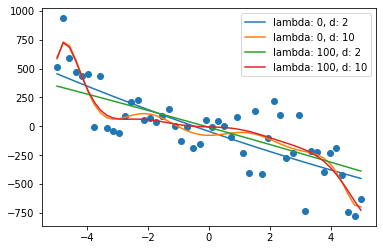

In [89]:
factors5 = [0, 100]
d5 = [2, 10]

plt.scatter(X2, y2)

for i in range(len(factors5)):
    for j in range(len(d5)):
        design_matrix_j = PolynomialFeatures(d5[j]).fit_transform(X2)
        y_pred_j = Ridge(alpha=factors5[i], fit_intercept=False).fit(design_matrix_j, y2).predict(design_matrix_j)
        
        plt.plot(X2, y_pred_j, label="lambda: " + str(factors5[i]) + ", d: " + str(d5[j]))
        
plt.legend()

### (b)

Kao u zadataku 3b, razdvojite primjere na skup za učenje i skup za ispitivanje u omjeru 1:1. Prikažite krivulje logaritama pogreške učenja i ispitne pogreške u ovisnosti za model $\mathcal{H}_{d=10,\lambda}$, podešavajući faktor regularizacije $\lambda$ u rasponu $\lambda\in\{0,1,\dots,50\}$.

**Q:** Kojoj strani na grafikonu odgovara područje prenaučenosti, a kojoj podnaučenosti? Zašto?

**Q:** Koju biste vrijednosti za $\lambda$ izabrali na temelju ovih grafikona i zašto?


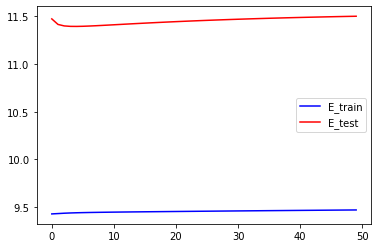

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.5)

E_train_list = []
E_test_list = []

def calculate_errors(X_train, X_test, y_train, y_test, di, alpha):
    design_matrix_train = PolynomialFeatures(di).fit_transform(X_train)
    reg_train = Ridge(alpha=alpha, fit_intercept=False).fit(design_matrix_train, y_train)
    t_pred_train = reg_train.predict(design_matrix_train)
    E_train = metrics.mean_squared_error(y_train, t_pred_train)

    design_matrix_test = PolynomialFeatures(di).fit_transform(X_test)
    y_pred_test = reg_train.predict(design_matrix_test)
    E_test = metrics.mean_squared_error(y_test, y_pred_test)
    
    return E_train, E_test

for alpha in range(50):
    E_train, E_test = calculate_errors(X_train, X_test, y_train, y_test, 10, alpha)
    E_train_list.append(math.log(E_train))
    E_test_list.append(math.log(E_test))

plt.plot(range(50), E_train_list, color='b', label="E_train")
plt.plot(range(50), E_test_list, color='r', label="E_test")
plt.legend()

### 6. L1-regularizacija i L2-regularizacija

Svrha regularizacije jest potiskivanje težina modela $\mathbf{w}$ prema nuli, kako bi model bio što jednostavniji. Složenost modela može se okarakterizirati normom pripadnog vektora težina $\mathbf{w}$, i to tipično L2-normom ili L1-normom. Za jednom trenirani model možemo izračunati i broj ne-nul značajki, ili L0-normu, pomoću sljedeće funkcije koja prima vektor težina $\mathbf{w}$:

In [62]:
def nonzeroes(coef, tol=1e-6): 
    return len(coef) - len(coef[np.isclose(0, coef, atol=tol)])

### (a)

Za ovaj zadatak upotrijebite skup za učenje i skup za testiranje iz zadatka 3b. Trenirajte modele **L2-regularizirane** polinomijalne regresije stupnja $d=10$, mijenjajući hiperparametar $\lambda$ u rasponu $\{1,2,\dots,100\}$. Za svaki od treniranih modela izračunajte L{0,1,2}-norme vektora težina $\mathbf{w}$ te ih prikažite kao funkciju od $\lambda$. Pripazite što točno šaljete u funkciju za izračun normi.

**Q:** Objasnite oblik obiju krivulja. Hoće li krivulja za $\|\mathbf{w}\|_2$ doseći nulu? Zašto? Je li to problem? Zašto?

**Q:** Za $\lambda=100$, koliki je postotak težina modela jednak nuli, odnosno koliko je model rijedak?

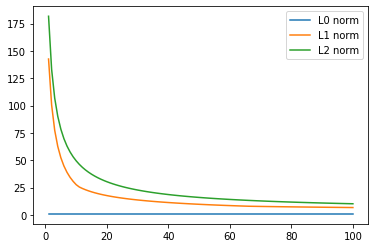

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.5)

l0_list = []
l1_list = []
l2_list = []

for alpha in range(1, 101):
    design_matrix_train = PolynomialFeatures(10).fit_transform(X_train)
    reg_train = Ridge(alpha=alpha, fit_intercept=False).fit(design_matrix_train, y_train)
    y_pred_train = reg_train.predict(design_matrix_train)

    design_matrix_test = PolynomialFeatures(10).fit_transform(X_test)
    y_pred_test = reg_train.predict(design_matrix_test)
    
    l0_list.append(nonzeroes(reg_train.coef_))
    l1_list.append(linalg.norm(reg_train.coef_, 1))
    l2_list.append(linalg.norm(reg_train.coef_))

plt.plot(range(1, 101), l0_list, label="L0 norm")
plt.plot(range(1, 101), l1_list, label="L1 norm")
plt.plot(range(1, 101), l2_list, label="L2 norm")
plt.legend()

### (b)

Glavna prednost L1-regularizirane regresije (ili *LASSO regression*) nad L2-regulariziranom regresijom jest u tome što L1-regularizirana regresija rezultira **rijetkim modelima** (engl. *sparse models*), odnosno modelima kod kojih su mnoge težine pritegnute na nulu. Pokažite da je to doista tako, ponovivši gornji eksperiment s **L1-regulariziranom** regresijom, implementiranom u klasi  [`Lasso`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html) u modulu [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model). Zanemarite upozorenja.

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 208409.58327767253, tolerance: 242.6186633251134
  positive)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 213287.72394539046, tolerance: 242.6186633251134
  positive)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 217801.35889427102, tolerance: 242.6186633251134
  positive)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 221962.760776

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 263984.1828858404, tolerance: 242.6186633251134
  positive)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 263900.2292581064, tolerance: 242.6186633251134
  positive)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 263816.32102418144, tolerance: 242.6186633251134
  positive)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 263732.48662943

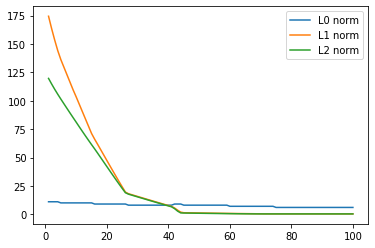

In [96]:
from sklearn.linear_model import Lasso
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.5)

l0_list = []
l1_list = []
l2_list = []

for alpha in range(1, 101):
    design_matrix_train = PolynomialFeatures(10).fit_transform(X_train)
    reg_train = Lasso(alpha=alpha, fit_intercept=False).fit(design_matrix_train, y_train)
    y_pred_train = reg_train.predict(design_matrix_train)

    design_matrix_test = PolynomialFeatures(10).fit_transform(X_test)
    y_pred_test = reg_train.predict(design_matrix_test)
    
    l0_list.append(nonzeroes(reg_train.coef_))
    l1_list.append(linalg.norm(reg_train.coef_, 1))
    l2_list.append(linalg.norm(reg_train.coef_))

plt.plot(range(1, 101), l0_list, label="L0 norm")
plt.plot(range(1, 101), l1_list, label="L1 norm")
plt.plot(range(1, 101), l2_list, label="L2 norm")
plt.legend()

### 7. Značajke različitih skala

Često se u praksi možemo susreti sa podatcima u kojima sve značajke nisu jednakih magnituda. Primjer jednog takvog skupa je regresijski skup podataka `grades` u kojem se predviđa prosjek ocjena studenta na studiju (1--5) na temelju dvije značajke: bodova na prijamnom ispitu (1--3000) i prosjeka ocjena u srednjoj školi. Prosjek ocjena na studiju izračunat je kao težinska suma ove dvije značajke uz dodani šum.

Koristite sljedeći kôd kako biste generirali ovaj skup podataka.

In [98]:
n_data_points = 500
np.random.seed(69)

# Generiraj podatke o bodovima na prijamnom ispitu koristeći normalnu razdiobu i ograniči ih na interval [1, 3000].
exam_score = np.random.normal(loc=1500.0, scale = 500.0, size = n_data_points) 
exam_score = np.round(exam_score)
exam_score[exam_score > 3000] = 3000
exam_score[exam_score < 0] = 0

# Generiraj podatke o ocjenama iz srednje škole koristeći normalnu razdiobu i ograniči ih na interval [1, 5].
grade_in_highschool = np.random.normal(loc=3, scale = 2.0, size = n_data_points)
grade_in_highschool[grade_in_highschool > 5] = 5
grade_in_highschool[grade_in_highschool < 1] = 1

# Matrica dizajna.
grades_X = np.array([exam_score,grade_in_highschool]).T

# Završno, generiraj izlazne vrijednosti.
rand_noise = np.random.normal(loc=0.0, scale = 0.5, size = n_data_points)
exam_influence = 0.9
grades_y = ((exam_score / 3000.0) * (exam_influence) + (grade_in_highschool / 5.0) \
            * (1.0 - exam_influence)) * 5.0 + rand_noise
grades_y[grades_y < 1] = 1
grades_y[grades_y > 5] = 5

**a)** Iscrtajte ovisnost ciljne vrijednosti (y-os) o prvoj i o drugoj značajki (x-os). Iscrtajte dva odvojena grafa.

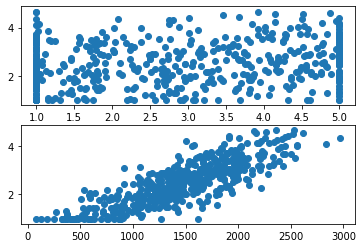

In [99]:
plt.subplot(2, 1, 1)
plt.scatter(grade_in_highschool, grades_y)

plt.subplot(2, 1, 2)
plt.scatter(exam_score, grades_y)

**b)** Naučite model L2-regularizirane regresije ($\lambda = 0.01$), na podacima `grades_X` i `grades_y`:

[0.00141497 0.09477276]


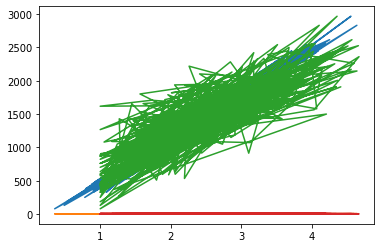

In [100]:
reg7 = Ridge(alpha=0.01).fit(grades_X, grades_y)
y_pred7 = reg7.predict(grades_X)

print(reg7.coef_)

plt.plot(y_pred7, grades_X)
plt.plot(grades_y, grades_X)

Sada ponovite gornji eksperiment, ali prvo skalirajte podatke `grades_X` i `grades_y` i spremite ih u varijable `grades_X_fixed` i `grades_y_fixed`. Za tu svrhu, koristite [`StandardScaler`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).

In [101]:
from sklearn.preprocessing import StandardScaler

In [105]:
scaler = StandardScaler()

grades_X_fixed = StandardScaler(copy=True, with_mean=True, with_std=True).fit_transform(grades_X)
grades_y_fixed = StandardScaler(copy=True, with_mean=True, with_std=True).fit_transform(grades_y.reshape(-1, 1))

reg7 = Ridge(alpha=0.01).fit(grades_X_fixed, grades_y_fixed)
y_pred7 = reg7.predict(grades_X_fixed)

print(reg7.coef_)

[[0.81630375 0.15167761]]


**Q:** Gledajući grafikone iz podzadatka (a), koja značajka bi trebala imati veću magnitudu, odnosno važnost pri predikciji prosjeka na studiju? Odgovaraju li težine Vašoj intuiciji? Objasnite.  

### 8. Multikolinearnost i kondicija matrice

**a)** Izradite skup podataka `grades_X_fixed_colinear` tako što ćete u skupu `grades_X_fixed` iz
zadatka *7b* duplicirati zadnji stupac (ocjenu iz srednje škole). Time smo efektivno uveli savršenu multikolinearnost.

In [106]:
grades_X_fixed_colinear = np.insert(grades_X_fixed, 2, grades_X_fixed[:,1],axis=1)
print(grades_X_fixed_colinear)

[[ 0.95063817 -0.78607869 -0.78607869]
 [-0.50343434 -0.50193004 -0.50193004]
 [ 1.18596832 -0.52213172 -0.52213172]
 ...
 [-0.31593552  0.80074234  0.80074234]
 [ 0.81288393  1.24783236  1.24783236]
 [-0.01938126  1.21729714  1.21729714]]


Ponovno, naučite na ovom skupu L2-regularizirani model regresije ($\lambda = 0.01$).

In [107]:
reg7 = Ridge(alpha=0.01, fit_intercept=False).fit(grades_X_fixed_colinear, grades_y_fixed)
y_pred7 = reg7.predict(grades_X_fixed_colinear)
print(reg7.coef_)

[[0.81630364 0.07583957 0.07583957]]


**Q:** Usporedite iznose težina s onima koje ste dobili u zadatku *7b*. Što se dogodilo?

**b)** Slučajno uzorkujte 50% elemenata iz skupa `grades_X_fixed_colinear` i naučite dva modela L2-regularizirane regresije, jedan s $\lambda=0.01$ i jedan s $\lambda=1000$). Ponovite ovaj pokus 10 puta (svaki put s drugim podskupom od 50% elemenata).  Za svaki model, ispišite dobiveni vektor težina u svih 10 ponavljanja te ispišite standardnu devijaciju vrijednosti svake od težina (ukupno šest standardnih devijacija, svaka dobivena nad 10 vrijednosti).

In [109]:
w1=np.array([])
w2=np.array([])

for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(grades_X_fixed_colinear, grades_y_fixed, test_size=0.5)
    
    reg7 = Ridge(alpha=0.01, fit_intercept=False).fit(X_train, y_train)
    y_pred7 = reg7.predict(X_train)
    
    reg7_2 = Ridge(alpha=1000, fit_intercept=False).fit(X_train, y_train)
    y_pred7_2 = reg7_2.predict(X_train)
    
    if i == 0:
        w1 = reg7.coef_
        w2 = reg7_2.coef_
    else:
        w1 = np.vstack([w1, reg7.coef_])
        w2 = np.vstack([w2, reg7_2.coef_])
    

print("w1:")
print(w1)

print("w2:")
print(w2)
    
print()
 
print("w1 std:")
print(np.std(w1[:,0]))
print(np.std(w1[:,1]))
print(np.std(w1[:,2]))

print("w2 std:")
print(np.std(w2[:,0]))
print(np.std(w2[:,1]))
print(np.std(w2[:,2]))

w1:
[[0.79848923 0.04464876 0.04464876]
 [0.86015311 0.08692778 0.08692778]
 [0.82669317 0.07276612 0.07276612]
 [0.83836132 0.08313673 0.08313673]
 [0.82146221 0.05195232 0.05195232]
 [0.85321299 0.0846136  0.0846136 ]
 [0.85639895 0.07912494 0.07912494]
 [0.82437045 0.06844761 0.06844761]
 [0.80359578 0.0921474  0.0921474 ]
 [0.81534875 0.08928283 0.08928283]]
w2:
[[0.16421812 0.02838761 0.02838761]
 [0.16541644 0.03299814 0.03299814]
 [0.16481208 0.03010747 0.03010747]
 [0.1609575  0.02670381 0.02670381]
 [0.16539075 0.01872213 0.01872213]
 [0.15439804 0.03439817 0.03439817]
 [0.16898969 0.02583275 0.02583275]
 [0.17429958 0.02427713 0.02427713]
 [0.15355576 0.0344939  0.0344939 ]
 [0.15681855 0.03184594 0.03184594]]

w1 std:
0.02057861516274338
0.015216225207899458
0.015216225207744008
w2 std:
0.006207398935256533
0.0047723648123615585
0.004772364812361562


**Q:** Kako regularizacija utječe na stabilnost težina?  
**Q:** Jesu li koeficijenti jednakih magnituda kao u prethodnom pokusu? Objasnite zašto.

**c)** Koristeći [`numpy.linalg.cond`](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.linalg.cond.html) izračunajte kondicijski broj matrice $\mathbf{\Phi}^\intercal\mathbf{\Phi}+\lambda\mathbf{I}$, gdje je $\mathbf{\Phi}$ matrica dizajna (`grades_X_fixed_colinear`). Ponovite i za $\lambda=0.01$ i za $\lambda=10$.


In [112]:
print(numpy.linalg.cond(grades_X_fixed_colinear.T.dot(grades_X_fixed_colinear) + 0.01 * np.identity(3)))
print(numpy.linalg.cond(grades_X_fixed_colinear.T.dot(grades_X_fixed_colinear) + 10 * np.identity(3)))

100542.86653460482
101.54186653499362


**Q:** Kako regularizacija utječe na kondicijski broj matrice $\mathbf{\Phi}^\intercal\mathbf{\Phi}+\lambda\mathbf{I}$?  